In [0]:
#Feature engineering libraries
import numpy as np
import pandas as pd
#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Library for Natural Language Processing
import spacy
#To filter stop words (most commonly used words)
from spacy.lang.en.stop_words import STOP_WORDS
#String manipulation and punctuation checking of the text
import string
#Determining the linguistic features (creating parser)
from spacy.lang.en import English
#Creating vocablary from text and checking the frequency of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#Checking the accuracy of the model
from sklearn.metrics import accuracy_score
#Pipelining to work on updating data
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
#Classifying the text data
from sklearn.svm import LinearSVC
#Splitting the data for training and testing
from sklearn.model_selection import train_test_split

In [3]:
#Loading data from git remote repo
amzn_url = "https://raw.githubusercontent.com/Xugeodas/SentimentAnalyzer/master/amazon_cells_labelled.txt"
imdb_url = "https://raw.githubusercontent.com/Xugeodas/SentimentAnalyzer/master/imdb_labelled.txt"
yelp_url = "https://raw.githubusercontent.com/Xugeodas/SentimentAnalyzer/master/yelp_labelled.txt"
#Storing as dataframe
amzn_df = pd.read_table(amzn_url)
imdb_df = pd.read_table(imdb_url)
yelp_df = pd.read_table(yelp_url)
print(amzn_df)
print(imdb_df)
print(yelp_df)

    So there is no way for me to plug it in here in the US unless I go by a converter.  0
0                          Good case, Excellent value.                                  1
1                               Great for the jawbone.                                  1
2    Tied to charger for conversations lasting more...                                  0
3                                    The mic is great.                                  1
4    I have to jiggle the plug to get it to line up...                                  0
..                                                 ...                                 ..
994  The screen does get smudged easily because it ...                                  0
995  What a piece of junk.. I lose more calls on th...                                  0
996                       Item Does Not Match Picture.                                  0
997  The only thing that disappoint me is the infra...                                  0
998  You c

In [4]:
#Concatenating dataframe into 1 list
dataSet = [amzn_df,imdb_df,yelp_df]
print(dataSet)

[    So there is no way for me to plug it in here in the US unless I go by a converter.  0
0                          Good case, Excellent value.                                  1
1                               Great for the jawbone.                                  1
2    Tied to charger for conversations lasting more...                                  0
3                                    The mic is great.                                  1
4    I have to jiggle the plug to get it to line up...                                  0
..                                                 ...                                 ..
994  The screen does get smudged easily because it ...                                  0
995  What a piece of junk.. I lose more calls on th...                                  0
996                       Item Does Not Match Picture.                                  0
997  The only thing that disappoint me is the infra...                                  0
998  You 

In [0]:
#Adding Column Headers
for colname in dataSet:
    colname.columns = ["Message","Target"]

In [6]:
#Merging whole data into single dataset
key = ["Amazon","IMDB","Yelp"]
df = pd.concat(dataSet,keys=key)
print("Size of the DataFrame = ",df.shape)
df.head()

Size of the DataFrame =  (2745, 2)


Message  Target
Amazon 0                        Good case, Excellent value.       1
       1                             Great for the jawbone.       1
       2  Tied to charger for conversations lasting more...       0
       3                                  The mic is great.       1
       4  I have to jiggle the plug to get it to line up...       0

In [7]:
#Data cleaning
#Finding if there is missing data
df.isnull().sum()

Message    0
Target     0
dtype: int64

In [8]:
#Starting with NLP
#Loading English Language
nlp = spacy.load("en")
#Loading Stop words to filter later
stop_words = list(STOP_WORDS)
print(stop_words)

['next', 'to', 'do', 'go', 'ever', 'noone', 'much', 'after', 'latterly', 'everywhere', 'nine', 'though', 'while', 'yourself', 'already', 'of', 'anyone', 'became', 'yet', 'all', 'until', 'get', '‘s', 'call', 'itself', 'nevertheless', 'did', 'him', 'always', 'empty', 'hundred', 'toward', 'full', 'its', 'has', 'and', 'six', 'three', 'due', 'what', 'his', 'alone', 'eleven', 'last', 'somewhere', '‘m', 'each', 'around', 'along', 'cannot', 'else', '’ve', 're', 'then', 'every', 'out', 'although', 'sixty', 'without', 'namely', 'whither', 'various', 'thus', 'would', 'could', 'had', 'should', "'d", 'above', 'he', 'latter', 'whether', 'make', 'whoever', 'unless', 'therefore', 'thereupon', 'part', 'seems', 'only', 'nowhere', 'them', 'still', 'you', '‘ve', 'twelve', 'is', 'serious', 'again', 'beside', 'former', 'rather', 'seemed', 'being', 'even', 'for', 'anything', 'through', 'together', 'here', '‘re', 'besides', 'by', 'ourselves', 'no', 'sometime', 'among', 'are', 'however', 'beyond', 'if', 'be', 

In [0]:
#Morphological analysis
txt = str(df)
docx = nlp(txt)

In [10]:
#Lemmatizing of tokens
for word in docx:
    print(word.text,"Lemma =>",word.lemma_)

                                                       Lemma =>                                                       
Message Lemma => message
  Lemma =>  
Target Lemma => Target

 Lemma => 

Amazon Lemma => Amazon
0 Lemma => 0
                          Lemma =>                          
Good Lemma => good
case Lemma => case
, Lemma => ,
Excellent Lemma => excellent
value Lemma => value
. Lemma => .
       Lemma =>       
1 Lemma => 1

        Lemma => 
       
1 Lemma => 1
                               Lemma =>                               
Great Lemma => Great
for Lemma => for
the Lemma => the
jawbone Lemma => jawbone
. Lemma => .
       Lemma =>       
1 Lemma => 1

        Lemma => 
       
2 Lemma => 2
    Lemma =>    
Tied Lemma => tie
to Lemma => to
charger Lemma => charger
for Lemma => for
conversations Lemma => conversation
lasting Lemma => last
more Lemma => more
... Lemma => ...
       Lemma =>       
0 Lemma => 0

        Lemma => 
       
3 Lemma => 3
                  

In [0]:
#Lemma that are not pronouns
lemma_filter1 = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in docx]

In [0]:
#Filtering out Stopwords and Punctuations
Filter_txt = [ word for word in docx if word.is_stop == False and not word.is_punct ]

In [0]:
#Linguistic Features
#Punctuations
punctuations = string.punctuation
#Parser
parser = English()

In [0]:
#Function to create tokens of text
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    return mytokens

In [0]:
#Custom transformer using spaCy 
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

#Function to clean the text 
def clean_text(text):     
    return text.strip().lower()

In [0]:
#Vectorization
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1)) 
classifier = LinearSVC()
#Using Tfidf
tfvectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [0]:
#Splitting data
message = df['Message']
target = df['Target']
message_train, message_test, target_train, target_test = train_test_split(message, target, test_size=0.2, random_state=42)

In [0]:
# Create the  pipeline to clean, tokenize, vectorize, and classify 
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])

In [25]:
# Fit our data
pipe.fit(message_train,target_train)

Pipeline(memory=None,
         steps=[('cleaner', <__main__.predictors object at 0x7feecbd9aa20>),
                ('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function spacy_tokenizer at 0x7feecbd98048>,
                                 vocabulary=None)),
                ('classifier',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                

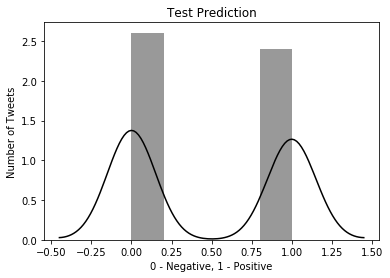

In [34]:
#Testing model
# Predicting with a test dataset
test_prediction = pipe.predict(message_test)
sns.distplot(test_prediction, color = "#000000")
plt.xlabel("0 - Negative, 1 - Positive")
plt.ylabel("Number of Tweets")
plt.title("Test Prediction")
plt.show()

In [35]:
# Accuracy
print("Accuracy: ",pipe.score(message_test,target_test))
print("Accuracy: ",pipe.score(message_test,test_prediction))

Accuracy:  0.7978142076502732
Accuracy:  1.0
